<a href="https://colab.research.google.com/github/ndthanhthuyf11/BI6_DistributionCenterOptimizatioAndRFM/blob/main/ANNs_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##libs

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz
from ann_visualizer.visualize import ann_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=0cb4a676f0b6b45b3a4faaee80ed79fbf39076bbfa57118254720bdac84c1182
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#libs for ANNs
# from keras.wrappers.scikit_learn import KerasClassifier as keras
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
#mounted
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Functions

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

• Number of hidden nodes: There is no magic formula for selecting the optimum number of hidden neurons. However, some thumb rules are available for calculating the number of hidden neurons. A rough approximation can be obtained by the geometric pyramid rule proposed by Masters (1993). For a three layer network with n input and m output neurons, the hidden layer would have n∗m−−−−−√ neurons.

In [ ]:
def add_exp(df, name, optimizer, epochs, num_layers, data, acc):
  arr = [name, optimizer, epochs, num_layers, data, acc]
  df.loc[len(df)] = arr
  return df
  # return pd.concat([arr, df.loc[:]]).reset_index(drop=True)

**phải thêm early_stopping nữa**

In [ ]:
def modeling_ann(x_train, y_train, input, epoch, batch):
  ann = Sequential()
  # adding the input layer and the first hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

  # adding the second hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

  # adding the output layer
  ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  #complie
  ann.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  # fit the model
  ann.fit(x_train, y_train, batch_size = batch, epochs = epoch, verbose = 0)


  return ann

In [ ]:
def modeling_ann_dropout(x_train, y_train, input, epoch, batch):
  ann = Sequential()
  # adding the input layer and the first hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
  ann.add(Dropout(rate = 0.1))

  # adding the second hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
  ann.add(Dropout(rate = 0.1))
  
  # adding the output layer
  ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  #complie
  ann.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  # fit the model
  ann.fit(x_train, y_train, batch_size = batch, epochs = epoch, verbose = 0)
  
  return ann

In [ ]:
def modeling_ann_earlystopping(x_train, y_train, input, epoch, batch):
  ann = Sequential()
  # adding the input layer and the first hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

  # adding the second hidden layer
  ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
  # adding the output layer
  ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  
  # add early stopping
  early_stopping = keras.callbacks.EarlyStopping(
      monitor='val_loss', min_delta=0, patience=5, verbose=0,
      mode='auto', baseline=None, restore_best_weights= True
  )
  ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # fit
  ann.fit(x_train, y_train, epochs=epoch, batch_size = 32, callbacks = early_stopping, validation_split=0.20)
  
  return ann

In [ ]:
def get_scores(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  score, acc = model.evaluate(x_test, y_test)
  print(classification_report(y_test,y_pred))
  return score, acc

In [ ]:
# model = modeling_ann_dropout(x_train, y_train, 10, 30, 32)

In [ ]:

# score, acc = get_scores(model, x_test, y_test)
# print('Test score:', score)
# print('Test accuracy:', acc)


#First view

In [ ]:
#read data
path = "/content/gdrive/Shareddrives/DA with R-Python/0.Project/Source code/asset/"
df1 = pd.read_csv(path+"internet_churncleaned2575.csv")
df2 = pd.read_csv(path+"internet_churncleaned0595.csv")

df_org = pd.read_csv(path+"internet_churncleaned.csv")

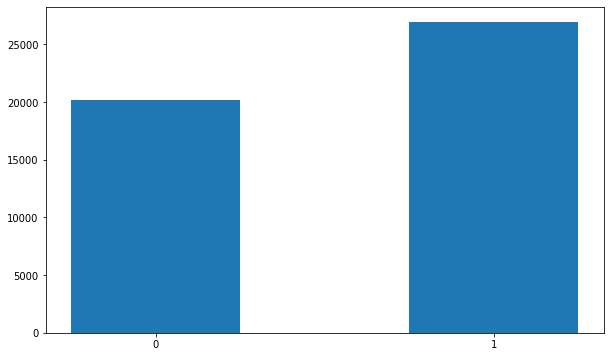

In [ ]:
df_churn = pd.DataFrame(data={'value': df1.churn.unique(), 'counts':df1.churn.value_counts()})
      
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_churn['value'], df_churn['counts'], width=0.5)
ax.set_xticks(df_churn['value']) 
# ax.bar(df.churn.unique(), df.churn.value_counts)
plt.show()


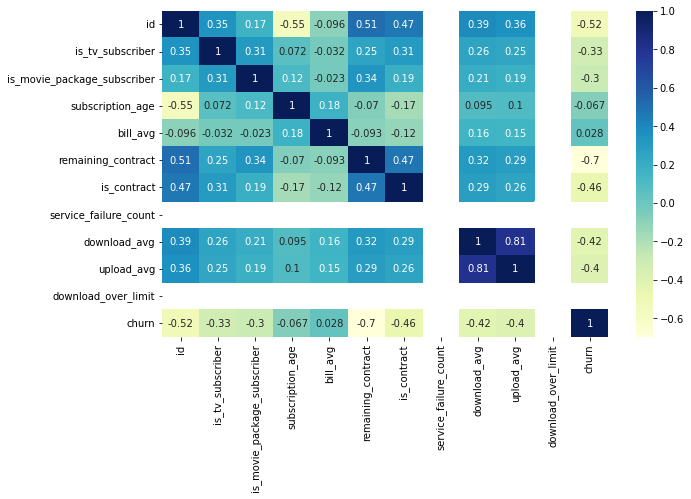

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), cmap = 'YlGnBu', annot = True)

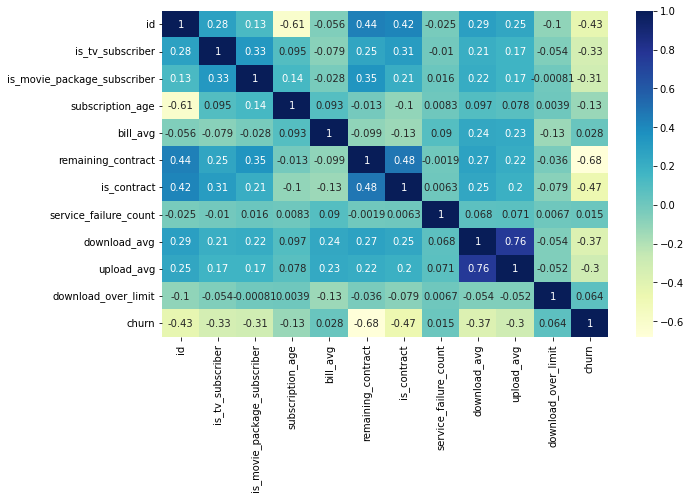

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), cmap = 'YlGnBu', annot = True)

In [ ]:
df_exp = pd.DataFrame(columns=['name', 'optimizer', 'epochs', 'num_hidden_layers', 'dataset', 'accuracy'])
df_exp

,name,optimizer,epochs,num_hidden_layers,dataset,accuracy


#ANNs - df_org




*   https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Fpython.plainenglish.io%2Fchurn-prediction-with-artificial-neural-networks-73ae4179f5dd
*   https://www.kaggle.com/code/javapocalypse/customer-churn-modelling-using-ann-86-accuracy
*https://www.kaggle.com/code/shrutimechlearn/deep-tutorial-1-ann-and-classification/notebook



In [ ]:
x = df_org.drop(['churn', 'id'],axis=1)
y = df_org['churn']
#split train:test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [ ]:
df_org.shape

(71893, 12)

In [ ]:
x_train.shape


(50325, 10)

In [ ]:
x_test.shape

(21568, 10)

## early stopping

In [ ]:

ann = Sequential()
# adding the input layer and the first hidden layer
ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# adding the second hidden layer
ann.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
# adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=0, patience=5, verbose=0,
#     mode='auto', baseline=None, restore_best_weights= True
# )
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# fit
ann.fit(x_train, y_train, epochs=10, batch_size = 32
        # , callbacks = early_stopping, validation_split=0.20
        )
# classifier.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose = 0)


Epoch 1/10
1573/1573 [==============================] - 4s 2ms/step - loss: 0.5160 - accuracy: 0.8238
Epoch 2/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3619 - accuracy: 0.8845
Epoch 3/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.8828
Epoch 4/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3342 - accuracy: 0.8825
Epoch 5/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3316 - accuracy: 0.8834
Epoch 6/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3302 - accuracy: 0.8827
Epoch 7/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3296 - accuracy: 0.8832
Epoch 8/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3282 - accuracy: 0.8841
Epoch 9/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3284 - accuracy: 0.8832
Epoch 10/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.327

In [ ]:
score, acc = get_scores(ann, x_test, y_test)

674/674 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8825
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      9581
           1       0.87      0.93      0.90     11987

    accuracy                           0.88     21568
   macro avg       0.89      0.88      0.88     21568
weighted avg       0.88      0.88      0.88     21568



In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 20,verbose=0)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean, variance)

0.921489953994751 0.013168073288205863


#ANNs -  Scale 

In [ ]:
scale = StandardScaler()
x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.transform(x_test)

In [ ]:
# ann = keras.Sequential([
#     keras.layers.Dense(10, input_shape=(10,), activation='relu'),
#     keras.layers.Dense(5, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# ann.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# history = ann.fit(x_train_sc, y_train, epochs=10)

Epoch 1/10
1573/1573 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8638
Epoch 2/10
1573/1573 [==============================] - 4s 3ms/step - loss: 0.2764 - accuracy: 0.9025
Epoch 3/10
1573/1573 [==============================] - 4s 3ms/step - loss: 0.2633 - accuracy: 0.9087
Epoch 4/10
1573/1573 [==============================] - 5s 3ms/step - loss: 0.2543 - accuracy: 0.9126
Epoch 5/10
1573/1573 [==============================] - 4s 3ms/step - loss: 0.2477 - accuracy: 0.9164
Epoch 6/10
1573/1573 [==============================] - 4s 3ms/step - loss: 0.2422 - accuracy: 0.9186
Epoch 7/10
1573/1573 [==============================] - 4s 3ms/step - loss: 0.2376 - accuracy: 0.9203
Epoch 8/10
1573/1573 [==============================] - 5s 3ms/step - loss: 0.2345 - accuracy: 0.9210
Epoch 9/10
1573/1573 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9225
Epoch 10/10
1573/1573 [==============================] - 5s 3ms/step - loss: 0.229

In [ ]:
#save model
# ann.save("/content/gdrive/Shareddrives/DA with R-Python/0.Project/Models/ann")


In [ ]:
#visualize ANNs network 
ann_viz(ann, view=True, title='ANNs', filename='/content/gdrive/Shareddrives/DA with R-Python/0.Project/img/ann.gv')

https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e

In [ ]:
add_exp(df_exp, 'ann - std scale', 'adam', 50, 3, 'cleaned', accuracy_score(y_test, y_pred))
df_exp

,name,optimizer,epochs,num_layers,dataset,accuracy
0,ann 2575,adam,30,3,cleaned-2575,0.470451
1,ann - std scale,adam,30,3,cleaned-2575,0.977449
2,ann,adam,50,3,cleaned,0.760286
3,ann - std scale,adam,50,3,cleaned,0.980489
4,ann - std scale,adam,50,3,cleaned,0.985840


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

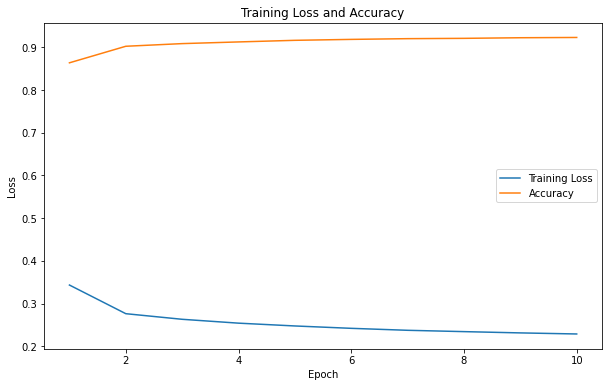

In [ ]:
plt.figure(figsize=(10, 6))

epochs = range(1, 10 + 1)
train_loss = history.history['loss']
acc = history.history['accuracy']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, acc, label="Accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

#ANNs with cleaned2575  - scale vs no scale

In [ ]:
x1 = df1.drop(['churn', 'id'],axis=1)
y1 = df1['churn']
#split train:test = 7:3
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=5)

In [ ]:
x_train1.shape

(33005, 9)

In [ ]:
x_test1.shape

(14146, 9)

In [ ]:
df1.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [ ]:
x_train1

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
5911,1,1,1.43,17,0.00,0,0.0,0.0,0
46170,1,0,0.09,15,1.88,0,44.4,1.7,0
28742,1,0,2.76,25,0.00,0,44.6,2.0,0
21230,1,1,3.98,17,1.93,0,87.0,8.1,0
31539,1,1,2.11,18,1.81,0,90.2,5.1,0
...,...,...,...,...,...,...,...,...,...
5520,0,0,3.08,23,0.00,0,5.0,0.5,0
35814,0,0,0.00,0,0.00,0,0.0,0.0,0
20463,1,0,1.97,30,0.00,0,33.8,2.7,0
18638,0,0,0.75,24,0.00,0,7.0,0.4,0


In [ ]:
scale = StandardScaler()
x_train_sc1 = scale.fit_transform(x_train1)
x_test_sc1 = scale.transform(x_test1)

**chạy với ko scale**

In [ ]:
ann2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
ann2.fit(x_train1, y_train1, epochs=30)


Epoch 1/30
1032/1032 [==============================] - 3s 2ms/step - loss: 3788.3525 - accuracy: 0.4966
Epoch 2/30
1032/1032 [==============================] - 3s 2ms/step - loss: 186.8183 - accuracy: 0.5004
Epoch 3/30
1032/1032 [==============================] - 3s 2ms/step - loss: 169.3027 - accuracy: 0.4995
Epoch 4/30
1032/1032 [==============================] - 3s 3ms/step - loss: 175.8374 - accuracy: 0.5061
Epoch 5/30
1032/1032 [==============================] - 5s 5ms/step - loss: 181.7561 - accuracy: 0.5053
Epoch 6/30
1032/1032 [==============================] - 3s 3ms/step - loss: 174.0190 - accuracy: 0.5139
Epoch 7/30
1032/1032 [==============================] - 3s 3ms/step - loss: 169.0131 - accuracy: 0.5190
Epoch 8/30
1032/1032 [==============================] - 3s 2ms/step - loss: 160.2796 - accuracy: 0.5198
Epoch 9/30
1032/1032 [==============================] - 2s 2ms/step - loss: 188.7626 - accuracy: 0.5189
Epoch 10/30
1032/1032 [==============================] - 3s 3ms

**có scale**

In [ ]:
ann2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
ann2.fit(x_train_sc, y_train, epochs=30)

Epoch 1/30
1032/1032 [==============================] - 3s 2ms/step - loss: 0.3189 - accuracy: 0.8710
Epoch 2/30
1032/1032 [==============================] - 3s 2ms/step - loss: 0.2132 - accuracy: 0.9195
Epoch 3/30
1032/1032 [==============================] - 2s 2ms/step - loss: 0.2023 - accuracy: 0.9236
Epoch 4/30
1032/1032 [==============================] - 2s 2ms/step - loss: 0.1967 - accuracy: 0.9265
Epoch 5/30
1032/1032 [==============================] - 2s 2ms/step - loss: 0.1927 - accuracy: 0.9274
Epoch 6/30
1032/1032 [==============================] - 2s 2ms/step - loss: 0.1892 - accuracy: 0.9291
Epoch 7/30
1032/1032 [==============================] - 3s 2ms/step - loss: 0.1865 - accuracy: 0.9300
Epoch 8/30
1032/1032 [==============================] - 3s 3ms/step - loss: 0.1839 - accuracy: 0.9309
Epoch 9/30
1032/1032 [==============================] - 3s 3ms/step - loss: 0.1816 - accuracy: 0.9314
Epoch 10/30
1032/1032 [==============================] - 3s 3ms/step - loss: 0.178

In [ ]:
len(ann2.weights)

In [ ]:
y_pred = ann2.predict(x_test_sc)
y_pred

443/443 [==============================] - 2s 4ms/step


array([[7.5905842e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [9.2363555e-04],
       [1.0000000e+00],
       [6.1696502e-03]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6000
           1       0.98      0.98      0.98      8146

    accuracy                           0.98     14146
   macro avg       0.98      0.98      0.98     14146
weighted avg       0.98      0.98      0.98     14146



In [ ]:
accuracy_score(y_test, y_pred)

0.9774494556765163

In [ ]:
add_exp(df_exp, 'ann - std scale', 'adam', 30, 3, 'cleaned-2575', accuracy_score(y_test, y_pred))
df_exp

,name,optimizer,epochs,num_layers,dataset,accuracy
0,ann 2575,adam,30,3,cleaned-2575,0.470451
1,ann - std scale,adam,30,3,cleaned-2575,0.977449


In [ ]:
# ann_viz(ann2, view=True, title='ANNs', filename='/content/gdrive/Shareddrives/DA with R-Python/0.Project/img/ann2.gv')

#Handling overfitting

https://machinelearningcoban.com/2017/03/04/overfitting/#-validation

## early stopping

In [ ]:

ann = Sequential()
# adding the input layer and the first hidden layer
ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# adding the second hidden layer
ann.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
# adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=0, patience=5, verbose=0,
#     mode='auto', baseline=None, restore_best_weights= True
# )
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# fit
ann.fit(x_train, y_train, epochs=10, batch_size = 32
        # , callbacks = early_stopping, validation_split=0.20
        )
# classifier.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose = 0)


Epoch 1/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.4932 - accuracy: 0.7832
Epoch 2/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8903
Epoch 3/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2875 - accuracy: 0.8990
Epoch 4/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2709 - accuracy: 0.9059
Epoch 5/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9124
Epoch 6/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2528 - accuracy: 0.9154
Epoch 7/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9162
Epoch 8/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2446 - accuracy: 0.9182
Epoch 9/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.2410 - accuracy: 0.9203
Epoch 10/10
1573/1573 [==============================] - 3s 2ms/step - loss: 0.238

In [ ]:
score, acc = get_scores(ann, x_test, y_test)

674/674 [==============================] - 1s 1ms/step - loss: 0.2366 - accuracy: 0.9181
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9581
           1       0.94      0.91      0.92     11987

    accuracy                           0.92     21568
   macro avg       0.92      0.92      0.92     21568
weighted avg       0.92      0.92      0.92     21568



#Model Selection

Need to get optimal parameters (epochs, batch_size, optimizer)



from sklearn.model_selection import GridSearchCV


In [ ]:
df_exp

,name,optimizer,epochs,num_hidden_layers,dataset,accuracy


In [ ]:
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 32],
              'epochs': [20, 30, 50, 100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(x_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


158/158 [==============================] - 0s 1ms/step


In [ ]:
print('Best Parameters: {}'.format(best_parameters))
print('Best Accuracy: {}'.format(best_accuracy))

In [ ]:
# df_exp.to_csv(path+"anns_df_exp"+datetime.now().strftime('%Y-%m-%d')+".csv", header=True, index=False)